In [2]:
#import data
import pandas as pd
dataset = pd.read_excel(r'BearingVibration_Dataset.xlsx')
data=pd.DataFrame(dataset)
data

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...,...
977,2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
978,2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


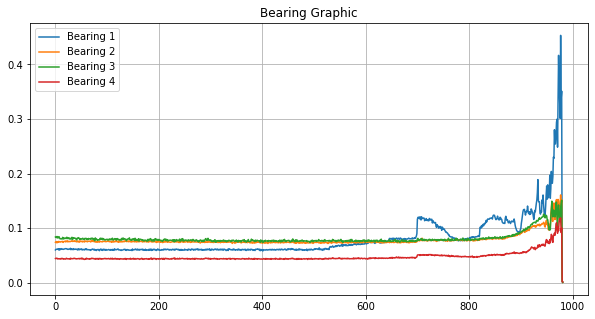

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(data['Bearing 1'])
ax.plot(data['Bearing 2'])
ax.plot(data['Bearing 3'])
ax.plot(data['Bearing 4'])
ax.set_title('Bearing Graphic')
ax.grid(True)
ax.legend(['Bearing 1','Bearing 2','Bearing 3','Bearing 4'])
plt.show()

In [4]:
# model specification
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
model.fit(data.iloc[:,1:5])


OneClassSVM(gamma=0.001, nu=0.03)

In [5]:
# prediction
pred = model.predict(data.iloc[:,1:5])
pred

array([-1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [6]:
from numpy import where

# filter outlier index
outlier_index = where(pred == -1) 
# filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...,...
977,2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
978,2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


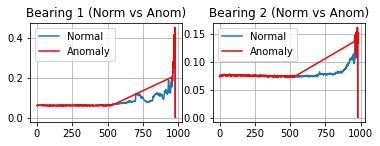

In [45]:
# visualize outputs
plt.subplot(2,2,1)
plt.plot(data["Bearing 1"])
plt.plot(outlier_values["Bearing 1"],c='r')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 1 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(data["Bearing 2"])
plt.plot(outlier_values["Bearing 2"],c='r')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 2 (Norm vs Anom)')
plt.grid(True)




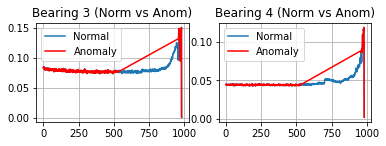

In [41]:
plt.subplot(2,2,1)
plt.plot(data["Bearing 3"])
plt.plot(outlier_values["Bearing 3"],c='r')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 3 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(data["Bearing 4"])
plt.plot(outlier_values["Bearing 4"],c='r')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 4 (Norm vs Anom)')
plt.grid(True)